### 4.10 Part 1.25 Mature Advanced Consumer
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Loyalty Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group

### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','000MAC.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag',
       'AgeIncome_flag'],
      dtype='object')

In [5]:
df.shape

(166385, 31)

In [6]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,166385.000000,166385.000000,166385.000000,166385.000000,166385.000000,166385.000000
mean,103989.820501,60.351504,268184.429462,25083.148721,20.833338,254.151567
std,59667.295777,11.846105,46801.909881,14333.401689,19.382147,454.886459
min,618.000000,41.000000,200194.000000,0.000000,1.000000,24.103300
25%,56304.000000,49.000000,230802.000000,13110.000000,7.000000,61.113628
50%,105739.000000,60.000000,262610.000000,24925.000000,15.000000,119.903008
75%,155252.000000,70.000000,290493.000000,37220.000000,29.000000,255.616188
max,205650.000000,81.000000,398957.000000,49688.000000,100.000000,7414.485185


### 3 -Analyzing Mature Advanced Consumer by Loyalty Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','fam_status','loyalty_flag']]

In [8]:
df11=df1.drop_duplicates().reset_index()

In [9]:
df11

,index,user_id,fam_status,loyalty_flag
0,1522,117740,married,Loyal customer
1,44264,33129,divorced/widowed,Regular customer
2,51267,159103,divorced/widowed,Regular customer
3,93695,3512,married,Regular customer
4,140218,110120,married,Loyal customer
...,...,...,...,...
571,9303230,81464,married,New customer
572,9307611,49205,married,New customer
573,9315107,120998,single,New customer
574,9329074,2700,divorced/widowed,Regular customer


#### -analyzing Mature  Advanced Consumer by Loyalty Flag and Family Status based on customers number

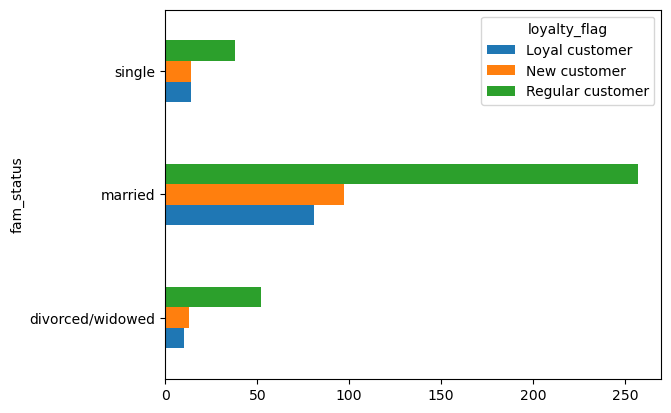

In [10]:
bar12=df11.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [11]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_LoyaltyFlag.png'))

### -analyzing Mature  Advanced Consumer by Loyalty Flag and Family Status based on purchase number

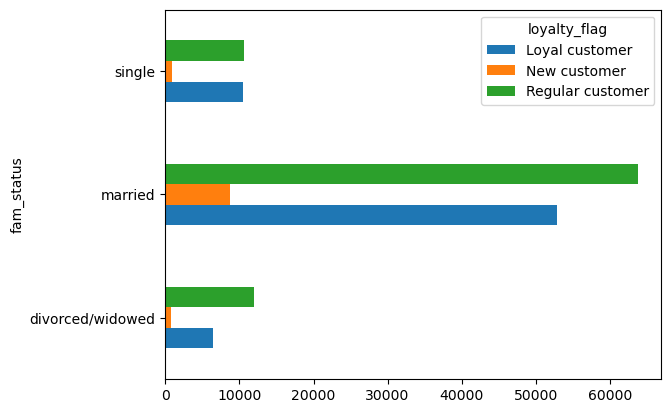

In [12]:
bar12=df1.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [13]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_LoyaltyFlagSales.png'))

### 4 -analyzing Mature  Advanced Consumer purshases by their income

In [26]:
df2=df[['prices', 'income']]

In [27]:
df2['prices'].sum()

42056338.2

In [28]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [29]:
df22

,mean_purshase
income,
200194,49.862778
200234,806.008929
200463,143.767273
200492,40.647046
200510,37.139293
...,...
391732,1415.880282
393034,174.738433
395861,471.975000


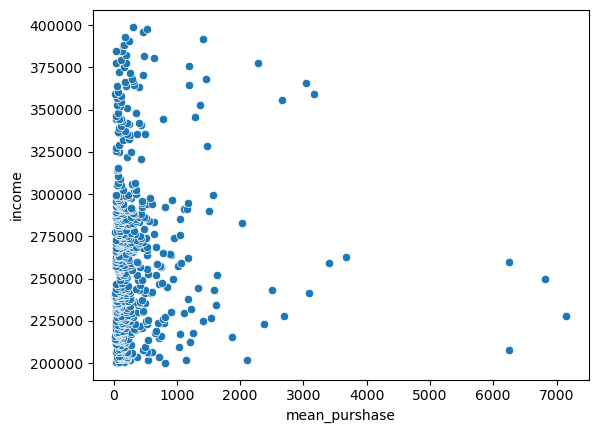

In [30]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22)

#### filter extrem big values

In [31]:
df22filtered=df22[df22['mean_purshase']<4000]

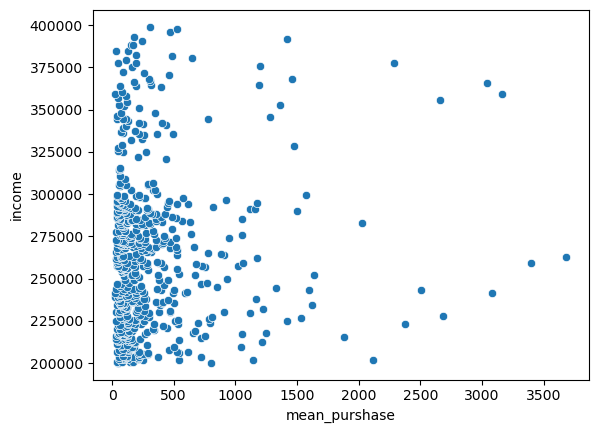

In [32]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtered)

In [33]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_PricesIncome.png'))

### 5 - Analyzing Mature  Advanced Consumer by Busiest_day

In [34]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [35]:
df4

,user_id,STATE,busiest_day,day_of_week
1522,117740,Oregon,Slowest days,4
1523,117740,Oregon,Regularly days,5
1524,117740,Oregon,Slowest days,3
1525,117740,Oregon,Regularly days,2
1526,117740,Oregon,Regularly days,5
...,...,...,...,...
10903086,42144,Kentucky,Slowest days,4
10903087,42144,Kentucky,Slowest days,3
10903088,42144,Kentucky,Slowest days,4
10903089,42144,Kentucky,Busiest days,0


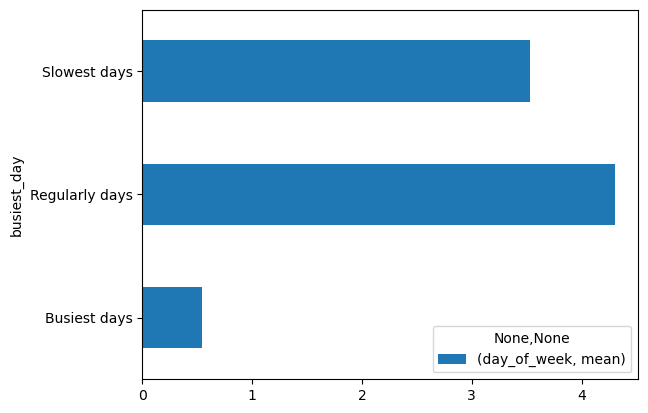

In [36]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [37]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_BusiestDayOfWeek.png'))

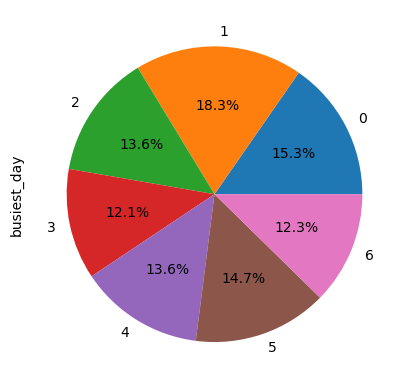

In [38]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [39]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    25530
1    30510
2    22597
3    20152
4    22636
5    24420
6    20540
Name: busiest_day, dtype: int64

In [40]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_pieBusiestDayOfWeek.png'))

#### -prefered hour of day

In [41]:
df44=df[['order_hour_of_day','user_id']]

In [42]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0       837
1       696
2       686
3       403
4       491
5       714
6      2322
7      4843
8      8743
9     12924
10    14110
11    14151
12    12814
13    13559
14    13485
15    14539
16    12679
17    10986
18     9266
19     6512
20     4706
21     3179
22     2291
23     1449
Name: user_id, dtype: int64

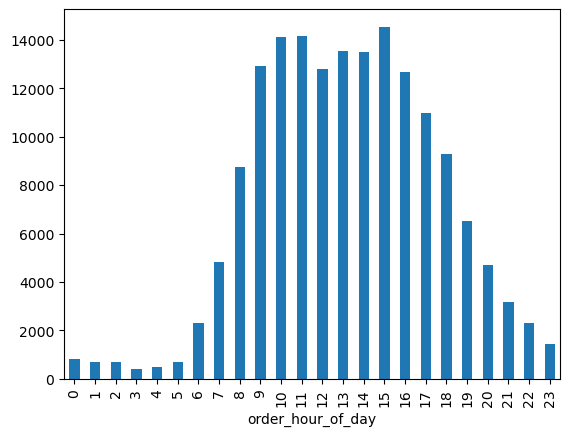

In [43]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [45]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_BusiestHourOfDay.png'))

### 6 - Analyzing number of Mature  Advanced Consumers by State

In [4]:
df5=df[['user_id','STATE']]

In [5]:
DF5=df5.drop_duplicates().reset_index()

In [57]:
DF5

,index,user_id,STATE
0,1522,117740,Oregon
1,44264,33129,Ohio
2,51267,159103,Massachusetts
3,93695,3512,Texas
4,140218,110120,Georgia
...,...,...,...
571,9303230,81464,Kansas
572,9307611,49205,South Carolina
573,9315107,120998,New Mexico
574,9329074,2700,Washington


#### number of rows indicate total number of MAC =576

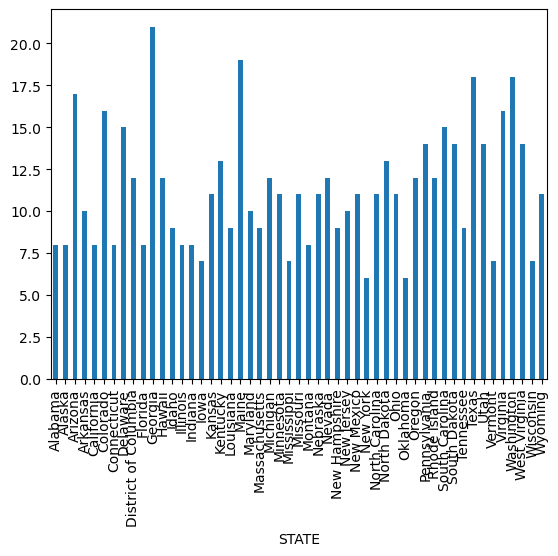

In [58]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [6]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                  8
Alaska                   8
Arizona                 17
Arkansas                10
California               8
Colorado                16
Connecticut              8
Delaware                15
District of Columbia    12
Florida                  8
Georgia                 21
Hawaii                  12
Idaho                    9
Illinois                 8
Indiana                  8
Iowa                     7
Kansas                  11
Kentucky                13
Louisiana                9
Maine                   19
Maryland                10
Massachusetts            9
Michigan                12
Minnesota               11
Mississippi              7
Missouri                11
Montana                  8
Nebraska                11
Nevada                  12
New Hampshire            9
New Jersey              10
New Mexico              11
New York                 6
North Carolina          11
North Dakota            13
Ohio                    11
Oklahoma              

#### -defining 10 Top States

In [59]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
Georgia           21
Maine             19
Washington        18
Texas             18
Arizona           17
Colorado          16
Virginia          16
South Carolina    15
Delaware          15
South Dakota      14
Name: user_id, dtype: int64

#### -saving the plot

In [60]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_UsersNumberState.png'))

### 7 - Analyzing Mature  Advanced Consumer  by n_dependants

In [61]:
df6=df[['user_id', 'n_dependants']]

In [62]:
DF6=df6.drop_duplicates()

In [63]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    141
1    141
2    146
3    148
Name: user_id, dtype: int64

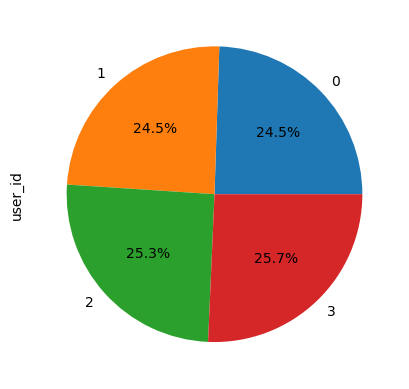

In [64]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [65]:
DF6

,user_id,n_dependants
1522,117740,1
44264,33129,0
51267,159103,0
93695,3512,2
140218,110120,3
...,...,...
9303230,81464,3
9307611,49205,1
9315107,120998,0
9329074,2700,0


#### saving the plot

In [66]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_NDependansUsers.png'))

### 8 - Analyzing Days since prior order

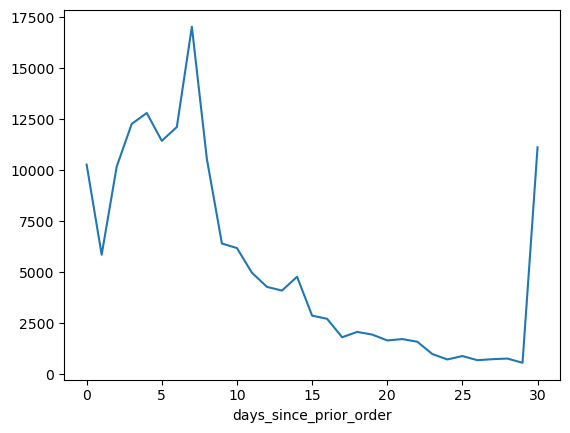

In [67]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [68]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     10284
1      5867
2     10187
3     12281
4     12814
5     11449
6     12128
7     17041
8     10556
9      6416
10     6193
11     4980
12     4288
13     4110
14     4788
15     2882
16     2724
17     1819
18     2083
19     1952
20     1665
21     1731
22     1601
23      997
24      732
25      899
26      696
27      745
28      776
29      569
30    11132
Name: days_since_prior_order, dtype: int64

In [69]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_DaysSincePriorOrder.png'))

### 9- Defining TOP products for client group


 #### creating subset

In [70]:
df18=df[['product_name','product_id','prices']]

In [71]:
df18

,product_name,product_id,prices
1522,Copper Coated Scrubbing Pads,2494,3.2
1523,Whole Milk,4210,13.5
1524,Eggo Chocolate Chip Waffles,6052,1.6
1525,Tomato Ketchup,7751,12.3
1526,Napa Cabbage,11526,6.4
...,...,...,...
10903086,Cucumber Kirby,49683,13.2
10903087,Original Entertaining Crackers,22471,5.4
10903088,Oven Roasted Turkey Breast,40310,1.9
10903089,Italian Style Chicken Meatballs with Mozarella...,43252,15.1


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [72]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().drop(index=3).head(10)

In [73]:
DF18

,product_name,prices
0,Banana,2341
1,Lowfat 2% Milkfat Cottage Cheese,1475
2,Bag of Organic Bananas,1241
4,Small Hass Avocado,595
5,100% Whole Wheat Bread,579
6,Blueberries,552
7,2% Reduced Fat Milk,525
8,Organic Avocado,522
9,Large Lemon,520
10,Organic Fuji Apple,487


In [77]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [78]:
DF18

,product_name,count_orders
0,Banana,2341
1,Lowfat 2% Milkfat Cottage Cheese,1475
2,Bag of Organic Bananas,1241
4,Small Hass Avocado,595
5,100% Whole Wheat Bread,579
6,Blueberries,552
7,2% Reduced Fat Milk,525
8,Organic Avocado,522
9,Large Lemon,520
10,Organic Fuji Apple,487


#### -creating plot

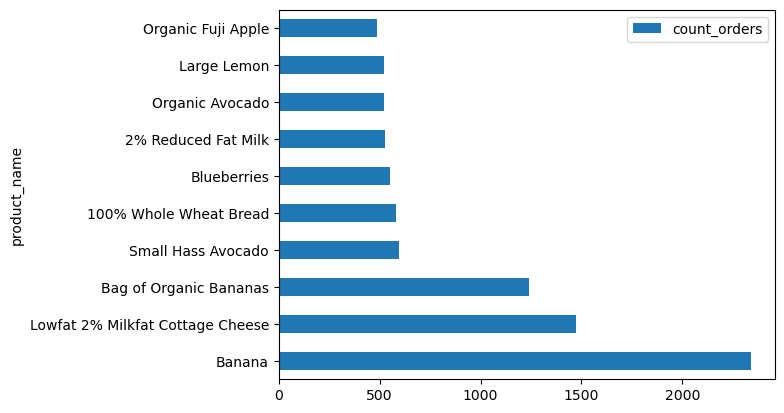

In [79]:
Bar21=DF18.plot.barh(x='product_name')

#### -saving the plot

In [80]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'MAC_Products.png'))